In [1]:
suppressPackageStartupMessages({
library(dplyr)
library(ggplot2)
})

In [13]:
make_pdf <- function(object, filename, w, h){
    out_name <- paste0(format(Sys.Date(), "%y%m%d"),"_",filename,".pdf")
    pdf(out_name, width=w, height=h)
        plot(object)
    dev.off()
}

In [2]:
setwd("/staging/leuven/stg_00041/Ryan/RA004_XHetDel/deep_seq/data/Ryan_Allsop/zUMI_out/")

In [9]:
deletion_metadata <- read.table("/staging/leuven/stg_00041/Ryan/RA004_XHetDel/240904_deletion_metadata.csv", 
                                header = TRUE, 
                                sep=",", 
                                colClasses = c("factor",
                                               "integer", 
                                               "integer")) %>%
    mutate(y_height=c(2, #1
                      2, #2
                      2, #3
                      0, # A
                      0, # B
                      1, # AB
                      0, # C
                      0, # D
                      1, # C-G
                      0, # E
                      0, # F
                      0, # G
                      0, # H
                      0, # I
                      0, # J
                      0, # K
                      1)) # I-TEL
    
TADs <- read.table("240228_mESC_TADs.tsv") #from doi:10.1038/nature11082 Table S4
colors <- c("A"="#772916",
            "B"="#D6C942",
            "AB"="#ED8766",
            "C"="#EEDE88",
            "D"="#A9AB36",
            "C-G"="#6BBE46",
            "E"="#CBEAF1",
            "F"="#5EC5BE",
            "G"="#06747C",
            "H"="#4D5BA8",
            "I"="#76AADB",
            "J"="#F7A9BB",
            "K"="#EF519D",
            "I-TEL"="#A655A1",
            "1"="#F6A8BA",
            "2"="#44BC99",
            "3"="#A8AA36")

In [10]:
options(repr.plot.width=4, repr.plot.height=2)
ExtDataFig1C <- ggplot(deletion_metadata) +
    geom_rect(data=TADs, aes(xmin=V2, 
                             xmax=V2, 
                             ymin=0.5, 
                             ymax=0.70), 
              color="black") +
    geom_rect(data=deletion_metadata,
              aes(xmin=Start,
                  xmax=End,
                  ymin=(y_height/6),
                  ymax=(y_height/6)+0.1666,
                  fill=Deletion),
              inherit.aes=FALSE,
              color="black") +
    geom_text(data=deletion_metadata,
              aes(x=(Start+End)/2, 
                  y=(y_height/6)+0.08333, 
                  label=Deletion),
              size=7*0.3528) +
    scale_fill_manual(values=colors) +
    xlim(0, 169000000) +
    theme_void() +
    theme(legend.position="none")

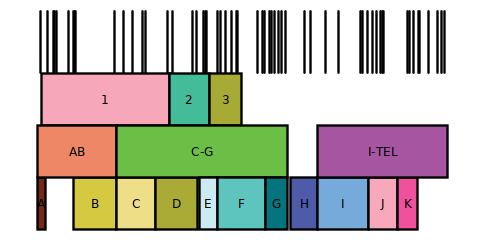

In [11]:
ExtDataFig1C

In [15]:
make_pdf(ExtDataFig1C, "tad_plot", w=3.5, h=1)

png 
  2